# Error Backpropagation

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. 실습용 데이터 생성

In [2]:
import numpy as np
np.set_printoptions(suppress = True, precision = 3)

> ## 1) Input : X (4 * 3)

In [3]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

> ## 2) Output : y (4 * 1)

In [4]:
y = np.array([0., 1., 1., 0.]).reshape(4, 1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

> ## 3) W1 (3 * 4)

In [5]:
np.random.seed(2045)
W1 = np.random.rand(3, 4)

W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

> ## 4) W2 (4 * 1)

In [6]:
np.random.seed(2046)
W2 = np.random.rand(4)

W2 = W2.reshape(4, 1)
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

> ## 5) y_hat (4 * 1)

In [7]:
np.random.seed(2045)
y_hat = np.random.rand(4).reshape(4, 1)

y_hat

array([[0.844],
       [0.886],
       [0.139],
       [0.061]])

> ## 6) Layer1 (4 * 4)

In [8]:
Layer1 = np.ones([4, 4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

# II. 함수 정의

> ## 1) sigmoid( )

* Activation Function

In [9]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

> ## 2) d_sigmoid( )

* sigmoid( ) 미분함수

In [10]:
def d_sigmoid(x):
    dy = x * (1.0 - x)
    return dy

> ## 3)Loss function

* Mean Squared Error

In [11]:
# def loss_function(y, y_hat):
#   Loss = np.mean((y - y_hat) ** 2)
#   return Loss 

* Binary Cross Entropy Error

In [12]:
def loss_function(y, y_hat):
  Loss = -np.mean((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
  return Loss 

# III. 순방향과 역방향 함수 정의

> ## 1) Forward_Propagation

* Layer1 Output
 * Layer1 = sigmoid(np.dot(X, W1))
* y_hat Output
 * y_hat = sigmoid(np.dot(Layer1, W2))

In [13]:
def forwardProp(X, W1, Layer1, W2, y_hat):
    Layer1 = sigmoid(np.dot(X, W1))
    y_hat = sigmoid(np.dot(Layer1, W2))

    return Layer1, y_hat

> ## 2) Back_Propagation

* d_W2
 * d_W2 = np.dot(np.transpose(Layer1), (-2 * (y - y_hat) * d_sigmoid(y_hat)))

<br>

* d_W1
 * d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
 * d_W1 = d_W1 * d_sigmoid(Layer1)
 * d_W1 = np.dot(np.transpose(X), d_W1)

<br>

* Gradient Descent
 * W1 = W1 - 0.8 * d_W1
 * W2 = W2 - 0.8 * d_W2

In [14]:
def backProp(X, y, y_hat, Layer1, W1, W2):
    d_W2 = np.dot(np.transpose(Layer1), (-2 * (y - y_hat) * d_sigmoid(y_hat)))

    d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
    d_W1 = d_W1 * d_sigmoid(Layer1)
    d_W1 = np.dot(np.transpose(X), d_W1)

    W1 = W1 - 0.8 * d_W1
    W2 = W2 - 0.8 * d_W2

    return y_hat, Layer1, W1, W2

# IV. 오차역전파를 적용한 Gradient Descent

* 학습 과정의 Loss 값 저장 객체

In [15]:
Loss_Record = []

> ## 1) Learning with Error Backpropagation

In [16]:
for k in range(0, 1000):
    Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
    y_hat, Layer1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)
    
    Loss_Record.append(loss_function(y, y_hat))

> ## 2) Parameter Update Check

* W1

In [17]:
W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

* W2

In [18]:
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

* y_hat

In [19]:
# y_hat.round()

y_hat

array([[0.788],
       [0.812],
       [0.829],
       [0.844]])

> ## 3) Visualization

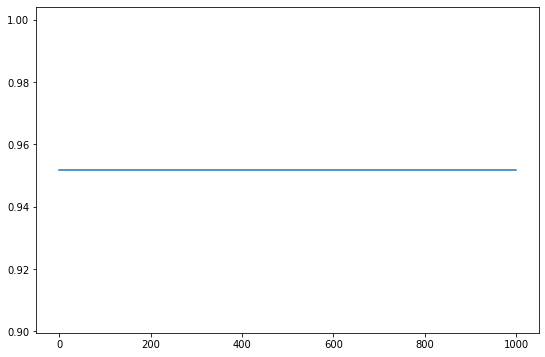

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(Loss_Record)
plt.show()

# 
# 
# 
# The End
# 
# 
# 